In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Problem 1

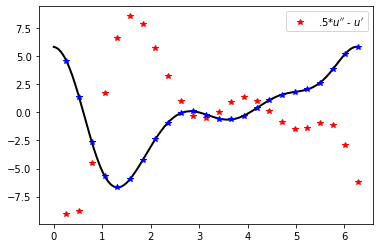

In [10]:
N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-N/2+1,0,1) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))
#get the second derivative approximation
fp2 = np.real(ifft(1j*k*fft(fp)))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = 2*np.sin(x2)*np.cos(x2)**2-np.sin(x2)**3+2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
#plot the equation we actually wanted
plt.plot(x1,.5*fp2-fp,'*r',label=".5*$u^{\prime\prime}$ - $u^\prime$")
plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.gca().legend()
plt.savefig('spectral2_derivative.pdf')
plt.show()

# Problem 2

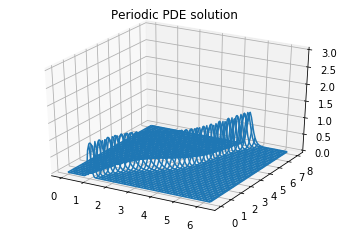

In [16]:
t_steps = 150 # Time steps
x_steps,N = 100,100 # x steps
x_domain = np.linspace(0,2*np.pi,x_steps)
t_domain = np.linspace(0,8,t_steps+1)
k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-N/2+1,0,1) ))
'''
Your code here to set things up
'''
initial = lambda x: np.exp(-100*((x-1)**2))
c = lambda x: .2+np.sin(x-1)**2
#calculate the c vector of the x domain which doesnt change at any time step
cvec = c(x_domain)
#define the vector to use to be solved with ODEint
fsolve = lambda u,t: -cvec*np.real(ifft((1j*k)*fft(u)))

sol = odeint(fsolve,initial(x_domain),t_domain) # RK4 method. Should return a t_steps by x_steps array

X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.title("Periodic PDE solution")
plt.show()